In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stripROtools
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import crystalball
from stripROtools import colors




In [2]:
# Load exp data
df_exp = pd.read_pickle("./data/resolution_exp.pk")

# Load sim data
df_sim = pd.read_pickle("./data/resolution_sim.pk")


df_sim.head()

,Name,x_res,x_res_err,y_res,y_res_err,abs_z
0,UH_DLC_a,"[41.11546853463489, 42.005214285034825, 45.172...","[0.9201750826904775, 0.8964145049534142, 1.332...","[40.325914735675795, 40.68594121518411, 43.446...","[0.8507159537741418, 0.9116217543339238, 1.027...","[0.2, 0.4, 0.6, 0.8, 1.0]"
1,UH_NoDLC_a,"[48.45428958991054, 46.207126822868794, 46.584...","[0.8447887242545079, 0.7911698409572208, 0.845...","[46.45362472008663, 46.024015446588514, 47.543...","[0.7735217181687978, 0.793808523893467, 0.8728...","[0.2, 0.4, 0.6, 0.8, 1.0]"
2,UoS,"[40.71875776099373, 40.90418013900924, 42.0841...","[1.2876681182961534, 1.2648396845327274, 1.423...","[39.79312496875324, 38.18073355181505, 41.5288...","[1.2327089931415198, 1.0780988612807185, 1.340...","[0.2, 0.4, 0.6, 0.8, 1.0]"


In [3]:
# fit function used to determine contributions to effective point resolution that are not included in simulation
def fit(x, a):
	return np.sqrt(x**2 + a**2)

# UH DLC Quadrant a

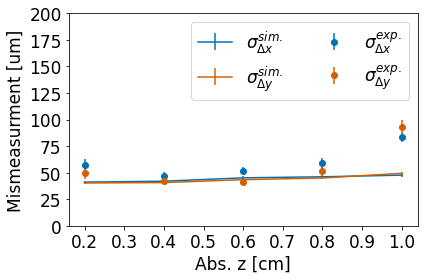

In [4]:
# index specifying detector
index = 0

abs_z = np.array(df_exp.iloc[index].abs_z)
x_res = np.array(df_exp.iloc[index].x_res)
x_res_err = np.array(df_exp.iloc[index].x_res_err)
y_res = np.array(df_exp.iloc[index].y_res)
y_res_err = np.array(df_exp.iloc[index].y_res_err)
x_res_sim = np.array(df_sim.iloc[index].x_res)
x_res_err_sim = np.array(df_sim.iloc[index].x_res_err)
y_res_sim = np.array(df_sim.iloc[index].y_res)
y_res_err_sim = np.array(df_sim.iloc[index].y_res_err)


plt.figure()
plt.errorbar(abs_z,x_res_sim,x_res_err_sim,color=colors["blue"],label="$\sigma_{\Delta x}^{sim.}$")
plt.errorbar(abs_z,y_res_sim,y_res_err_sim,color=colors["red"],label="$\sigma_{\Delta y}^{sim.}$")
plt.errorbar(abs_z,x_res,x_res_err, color=colors["blue"],fmt='o',label="$\sigma_{\Delta x}^{exp.}$")
plt.errorbar(abs_z,y_res,y_res_err, color=colors["red"],fmt='o',label="$\sigma_{\Delta y}^{exp.}$")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(ncol=2,fontsize=17)
plt.ylim((0,200))
plt.xlabel("Abs. z [cm]",fontsize=17)
plt.ylabel("Mismeasurment [um]",fontsize=17)
plt.tight_layout()
plt.savefig("./figures/UH_DLC_PR.pdf")


In [5]:
# Fit simulation data + additional resolution term to experimental data on the x strips

x_vals = x_res_sim
sigmas = np.sqrt(x_res_err**2 + x_res_err_sim**2)
y_vals = x_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the x strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])


x_vals = y_res_sim
sigmas = np.sqrt(y_res_err**2 + y_res_err_sim**2)
y_vals = y_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the y strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])




The additional point res. contribution on the x strips is:  35.535718581061744 +/- 3.0729621070057638
The additional point res. contribution on the y strips is:  20.235239847612227 +/- 4.11548726756449


# UH NoDLC Quadrant a

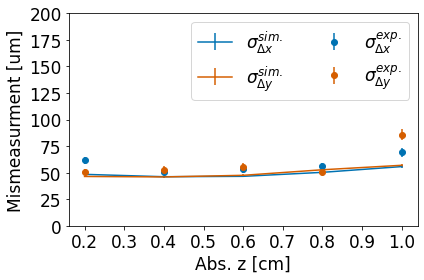

In [6]:
# index specifying detector
index = 1

abs_z = np.array(df_exp.iloc[index].abs_z)
x_res = np.array(df_exp.iloc[index].x_res)
x_res_err = np.array(df_exp.iloc[index].x_res_err)
y_res = np.array(df_exp.iloc[index].y_res)
y_res_err = np.array(df_exp.iloc[index].y_res_err)
x_res_sim = np.array(df_sim.iloc[index].x_res)
x_res_err_sim = np.array(df_sim.iloc[index].x_res_err)
y_res_sim = np.array(df_sim.iloc[index].y_res)
y_res_err_sim = np.array(df_sim.iloc[index].y_res_err)


plt.figure()
plt.errorbar(abs_z,x_res_sim,x_res_err_sim,color=colors["blue"],label="$\sigma_{\Delta x}^{sim.}$")
plt.errorbar(abs_z,y_res_sim,y_res_err_sim,color=colors["red"],label="$\sigma_{\Delta y}^{sim.}$")
plt.errorbar(abs_z,x_res,x_res_err, color=colors["blue"],fmt='o',label="$\sigma_{\Delta x}^{exp.}$")
plt.errorbar(abs_z,y_res,y_res_err, color=colors["red"],fmt='o',label="$\sigma_{\Delta y}^{exp.}$")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(ncol=2,fontsize=17)
plt.ylim((0,200))
plt.xlabel("Abs. z [cm]",fontsize=17)
plt.ylabel("Mismeasurment [um]",fontsize=17)
plt.tight_layout()
plt.savefig("./figures/UH_NoDLC_PR.pdf")


In [7]:
# Fit simulation data + additional resolution term to experimental data on the x strips

x_vals = x_res_sim
sigmas = np.sqrt(x_res_err**2 + x_res_err_sim**2)
y_vals = x_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the x strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])


x_vals = y_res_sim
sigmas = np.sqrt(y_res_err**2 + y_res_err_sim**2)
y_vals = y_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the y strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])




The additional point res. contribution on the x strips is:  28.852705179600164 +/- 3.243325565409449
The additional point res. contribution on the y strips is:  24.08779516873634 +/- 3.6873680262160313


# UoS Detector

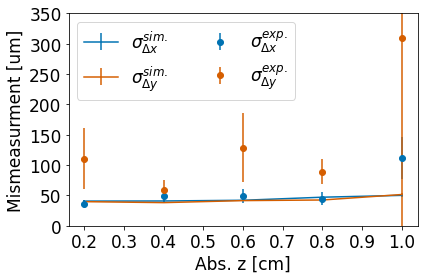

In [8]:
# index specifying detector
index = 2

##### Note!!! ##### 
# We switch x and y since the x strips are the upper strips in the (actual) UoS detector
# The plots in Po210.ipynb do not include this switch

abs_z = np.array(df_exp.iloc[index].abs_z)
x_res = np.array(df_exp.iloc[index].y_res)
x_res_err = np.array(df_exp.iloc[index].y_res_err)
y_res = np.array(df_exp.iloc[index].x_res)
y_res_err = np.array(df_exp.iloc[index].x_res_err)

x_res_sim = np.array(df_sim.iloc[index].x_res)
x_res_err_sim = np.array(df_sim.iloc[index].x_res_err)
y_res_sim = np.array(df_sim.iloc[index].y_res)
y_res_err_sim = np.array(df_sim.iloc[index].y_res_err)


plt.figure()
plt.errorbar(abs_z,x_res_sim,x_res_err_sim,color=colors["blue"],label="$\sigma_{\Delta x}^{sim.}$")
plt.errorbar(abs_z,y_res_sim,y_res_err_sim,color=colors["red"],label="$\sigma_{\Delta y}^{sim.}$")
plt.errorbar(abs_z,x_res,x_res_err, color=colors["blue"],fmt='o',label="$\sigma_{\Delta x}^{exp.}$")
plt.errorbar(abs_z,y_res,y_res_err, color=colors["red"],fmt='o',label="$\sigma_{\Delta y}^{exp.}$")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(ncol=2,fontsize=17)
plt.ylim((0,350))
plt.xlabel("Abs. z [cm]",fontsize=17)
plt.ylabel("Mismeasurment [um]",fontsize=17)
plt.tight_layout()
plt.savefig("./figures/UoS_PR.pdf")


In [9]:
# Fit simulation data + additional resolution term to experimental data on the x strips


x_vals = x_res_sim
sigmas = np.sqrt(x_res_err**2 + x_res_err_sim**2)
y_vals = x_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the x strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])


x_vals = y_res_sim
sigmas = np.sqrt(y_res_err**2 + y_res_err_sim**2)
y_vals = y_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the y strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])




The additional point res. contribution on the x strips is:  4.5305807898342465 +/- 39.725528903440676
The additional point res. contribution on the y strips is:  64.3316476851484 +/- 14.342946204367092
